[View in Colaboratory](https://colab.research.google.com/github/aunz/ds/blob/master/Gradient_descent.ipynb)

# Gradient descent

We will use gradient descent to find the intercept and slope for a simple linear regression 

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## Data creation

1) Create some random data with:
- Intercept  θ<sub>0</sub> = 3
- slope θ<sub>1</sub> = 5

2) Plot the data

3) Determine the intecept and slope with an analytical approach using matrix algebra **θ = (X' X)<sup>-1</sup> X' y**

4) Draw the regression line using theta from step 3

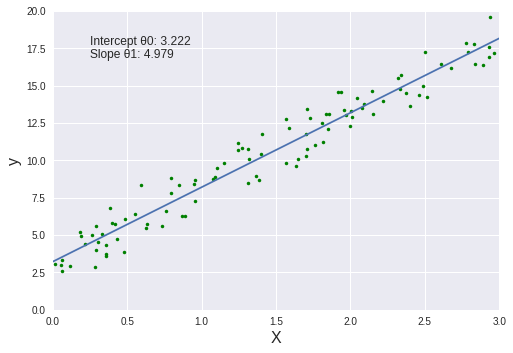

In [94]:
# 1) some random data
np.random.seed(0) # for reproducibility
X = 3 * np.random.rand(100, 1)
y = 3 + 5 * X + np.random.randn(100, 1)

# 2) plot the raw data
plt.plot(X, y, 'g.')
plt.xlabel('X', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.axis([0, np.ceil(X.max()), 0, np.ceil(y.max())])

# 3) determine theta
X_1 = np.column_stack((np.ones(len(X)), X)) # need to add a column of 1 for X
theta = np.linalg.inv(X_1.T.dot(X_1)).dot(X_1.T).dot(y)

# 4) draw the regression line
plt.plot([0, 3], np.dot([[1, 0], [1, 3]], theta))
plt.text(0.25, 17.5, 'Intercept θ0: {0[0]:.3f}\nSlope θ1: {1[0]:.3f}'.format(*theta), va='center');

The intercept (3.222) and slope (4.979) are not exactly the same but close to our pre-chosen intercept (3.0) and slope (5.0), due to random noise we introduced for y.

Now we can implement **gradient descent** and see what theta (intercept and slope) we will get. We will define
- Cost function: difference between the expected and target value
- Gradient

In [0]:
# there are many ways to define a cost function, but in the end it should return a single value
# the cost function below calculates root mean square error (RMSE)
def cost(target, prediction):
    return 1 / (2 * len(target)) * np.sum(np.square(prediction - target))

def gradient(X, y, theta, lr = 0.01):
    '''
    X: shape (, 1)
    y: shape (, 1)
    theta: shape (2, 1)
    lr: learning rate
    return cost, gradient and the next theta
    '''
    X_1 = np.column_stack((np.ones(len(X)), X))
    prediction = np.dot(X_1, theta)

    c = cost(y, prediction) # the cost
    g = 1 / len(y) * (X_1.T.dot(prediction - y)) # the gradient
    next_theta = theta - lr * g # next theta

    return c, g, next_theta

So our goal is to determine theta, with the functions defined, we can now start the process

1. Initialise theta with some random number
2. Determine the cost, the gradient, then the next theta
3. Repeat 1 and 2 till the cost is minimum and the gradient doesn't change much

In [307]:
np.random.seed(0)
theta = np.random.rand(2, 1) # 1, some random theta

print('''
Initial intercept: {0[0]}
Initial slope: {1[0]}
Cost: {2}
Gradient: {3[0][0]}
Next intercept: {4[0][0]}
Next slope: {4[1][0]}
'''.format(*theta, *gradient(X, y, theta)))


Initial intercept: 0.5488135039273248
Initial slope: 0.7151893663724195
Cost: 45.3241182851526
Gradient: -8.721017053320342
Next intercept: 0.6360236744605282
Next slope: 0.8707823747429001



We can see that the next intercept and slope move towards higher values.

Now we can repeat the process many many times

In [0]:
def cal_and_plot(epochs = 100, lr = 0.01):
    # epochs: how many times to repeat, iterations
    # lr: learning rate
    costs = np.zeros(epochs)
    gradients = np.zeros((epochs, 2, 1))
    thetas = np.zeros((epochs, 2, 1))

    np.random.seed(0)
    theta = np.random.rand(2, 1) # 1, some random theta

    epochs = list(range(epochs))
    for i in epochs:
        c, g, next_theta = gradient(X, y, theta, lr)
        costs[i] = c
        gradients[i] = g
        thetas[i] = theta
        theta = next_theta
        
    _, [ax0, ax1] = plt.subplots(1, 2, figsize=(20, 7))

    ax0.plot(epochs, costs, '.')
    ax0.set_xlabel('epochs')
    ax0.set_ylabel('cost')
    ax0.text(epochs[-1], costs.max(), 'Last cost: {:.3f}'.format(costs[-1]), ha='right')

    
    ax1.plot(epochs, thetas[:, 0, 0], '.', label='intercept θ0, last value: {:.3f}'.format(thetas[-1, 0, 0]))
    ax1.plot(epochs, thetas[:, 1, 0], '.', label='slope θ1, last value: {:.3f}'.format(thetas[-1, 1, 0]))
    ax1.legend()
    ax1.set_xlabel('epochs')
    ax1.set_ylabel('theta')
  
    
    return costs, gradients, thetas

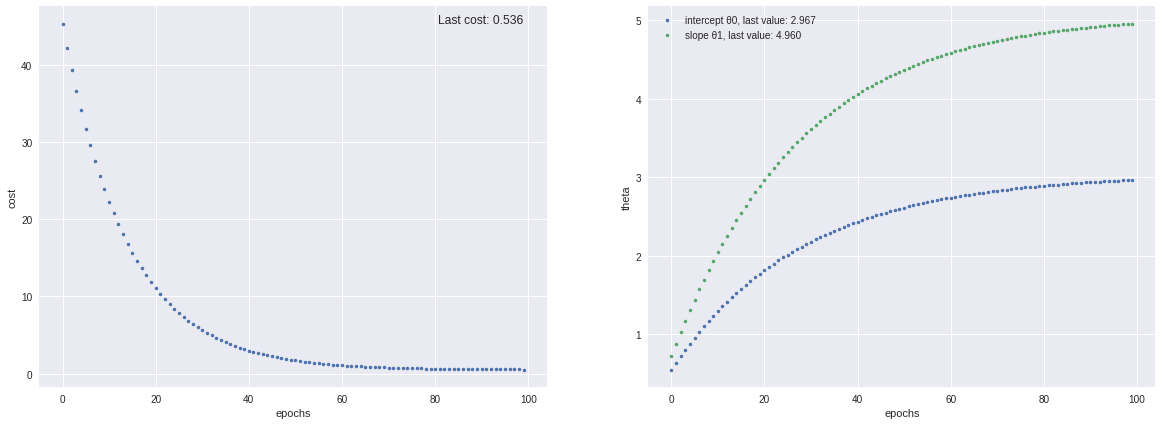

In [346]:
cal_and_plot();

We see that after each epoch, the cost decreases, the thetas move towards our expected values (3.222 and 4.979). But they are not quite there yet.

We have to increase our iterations/epochs

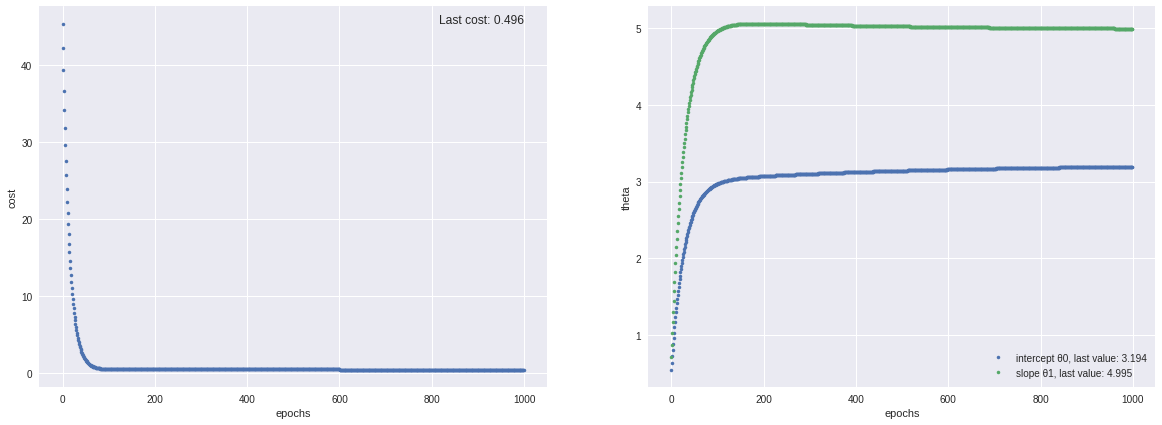

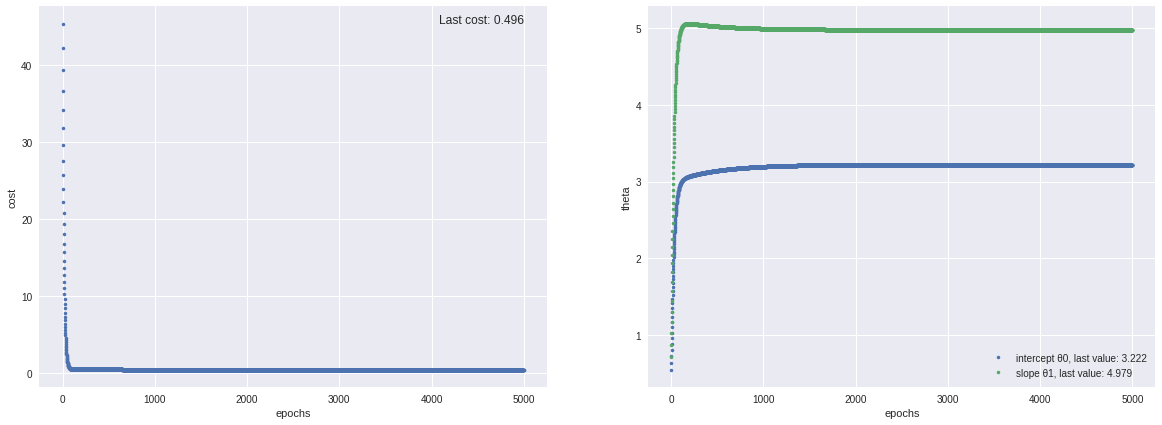

In [351]:
cal_and_plot(1000);
cal_and_plot(5000);

We see that even after 1000 epochs, the thetas are not quite there yet.

But after 5000 epochs, the final thetas are very close to our expected values of 3.222 and 4.979


5000 iterations seem a lot, maybe we can change the learning rate


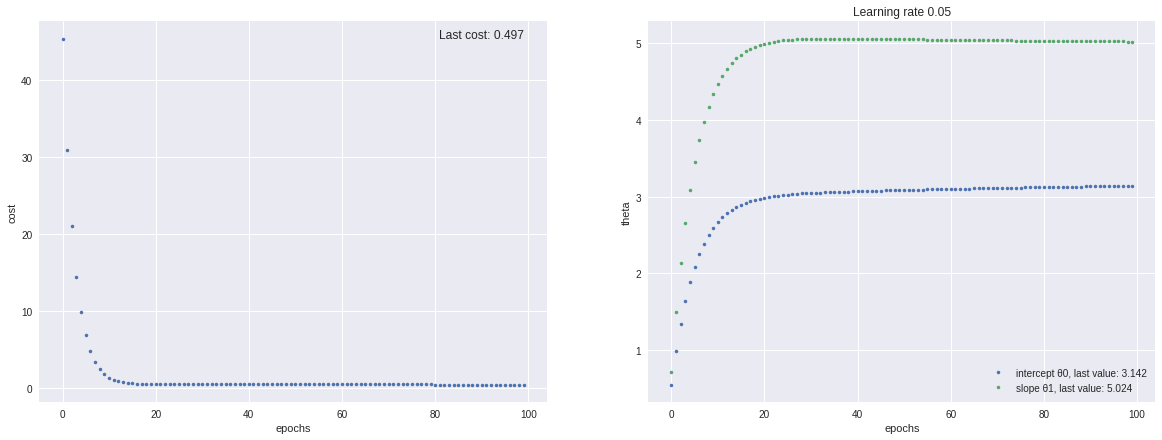

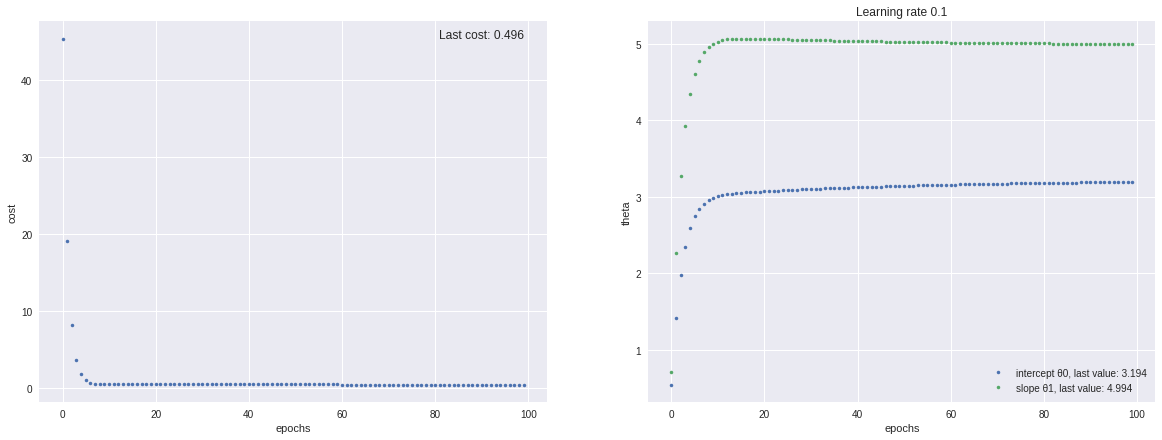

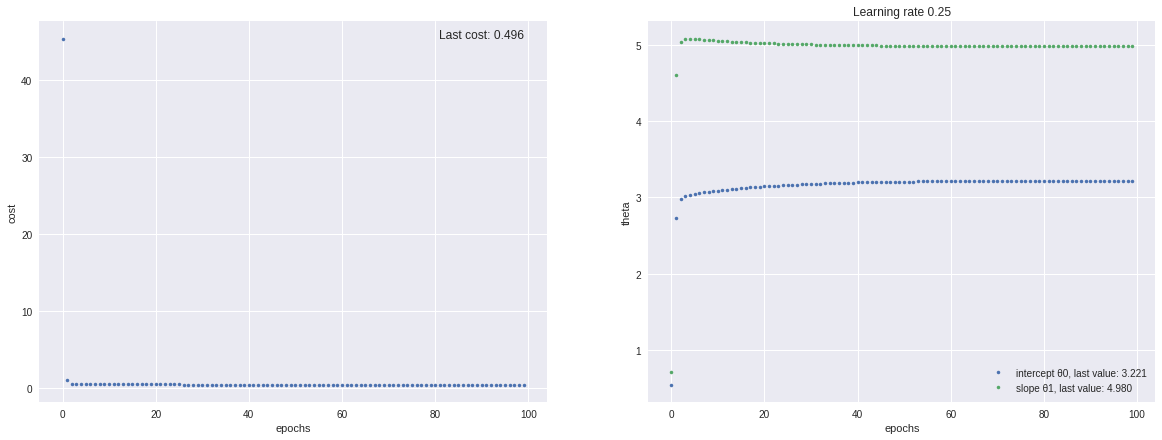

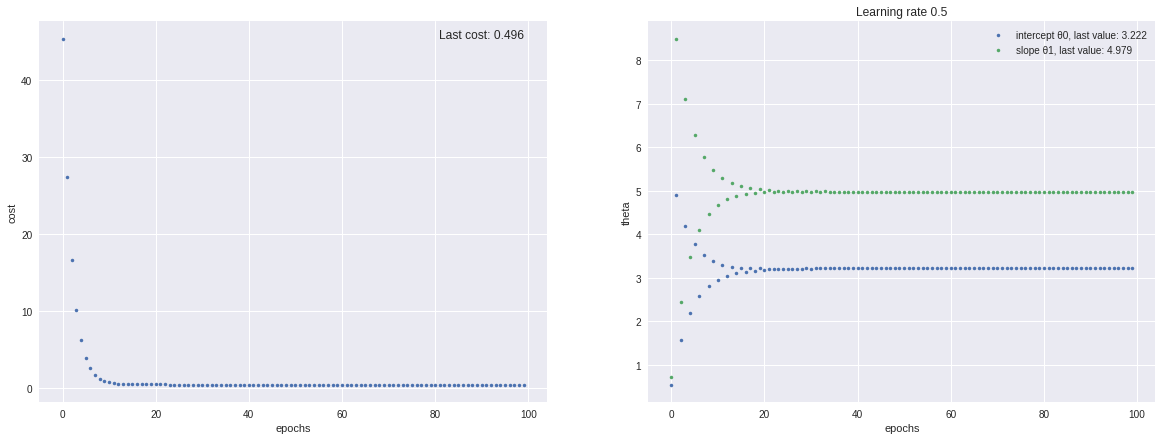

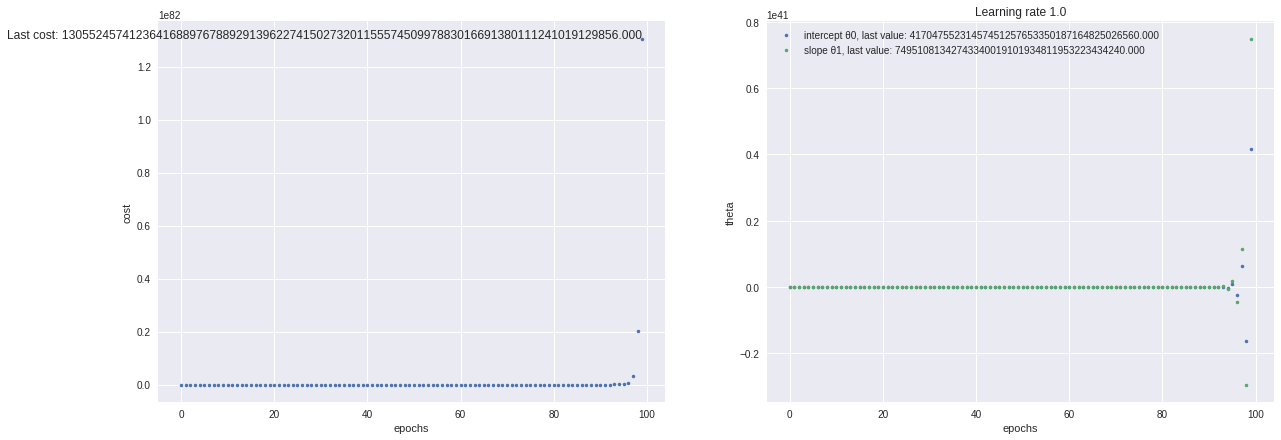

In [363]:
cal_and_plot(100, lr = 0.05)
plt.title('Learning rate 0.05')
cal_and_plot(100, lr = 0.1)
plt.title('Learning rate 0.1')
cal_and_plot(100, lr = 0.25)
plt.title('Learning rate 0.25')
cal_and_plot(100, lr = 0.5)
plt.title('Learning rate 0.5')
cal_and_plot(100, lr = 1)
plt.title('Learning rate 1.0');

We see that increasing the learning rate helps the models to converge faster.

However, too fast a learning rate (lr of 0.5, 1) causes divergence!

## 🎉 So now you know how to implement simple gradient descent in python

Choosing a learning rate and epoch is a balance between speed and precision